# Enhancements to Array Axis Summation

This file builds on the excellent code written by Patrick Pampo in Array Axis Summations.ipynb*. The following additions/enhancements/modifications have been made:

1) Matrix, times, sums, and time lists are printed for the first 5 iterations to explictly show what the code is doing.

2) The original code computes data only for 'Even' matrices. I have expanded the code to include data for 'Odd' matrices as well to see if the 'parity' plays any role in the computing time.

3) The original file produces 2 fits, one each for the column and row summation data for the 'Even' matrices. Since I have included the 'Odd' matrices as well, the enhanced code produces 4 fits overlayed to inspect any 'parity' dependence in the computation time.

4) I also combine the 'Odd' and 'Even' times together by averaging them to preserve the 1:1 correspondence with N_values and generate a grand plot with 2 fit curves, one each for the two cases.


While the overall trend for the Row and Column Data is replicated, it is observed that the Even Column Data has a slightly higher computational time than Odd Column Data for high values of N.

* The original file can be viewed here (https://github.com/ubsuny/CP1-24-HW2/blob/main/Array-axis-summations/Array%20Axis%20Summation.ipynb).

--------------------------------------------------------------------------------------------------------------
Matrix Size = 1x1
Even Matrix = [[0]]
Odd Matrix = [[1]]
Sum over rows (Even) = [0]
Sum over columns (Even) = [0]
Average Time for rows (Even) = 4.336797999712871e-06
Average Time for columns (Even) = 3.96394200015493e-06
Sum over rows (Odd) = [1]
Sum over columns (Odd) = [1]
Average Time for rows (Odd) = 3.764412000236916e-06
Average Time for columns (Odd) = 3.7162819999139176e-06
Row times list (Even): [4.336797999712871e-06]
Column times list (Even): [3.96394200015493e-06]
Row times list (Odd): [3.764412000236916e-06]
Column times list (Odd): [3.7162819999139176e-06]
--------------------------------------------------------------------------------------------------------------
Matrix Size = 2x2
Even Matrix = [[0 2]
 [4 6]]
Odd Matrix = [[1 3]
 [5 7]]
Sum over rows (Even) = [ 2 10]
Sum over columns (Even) = [4 8]
Average Time for rows (Even) = 3.903531999640108e-06
Average Ti

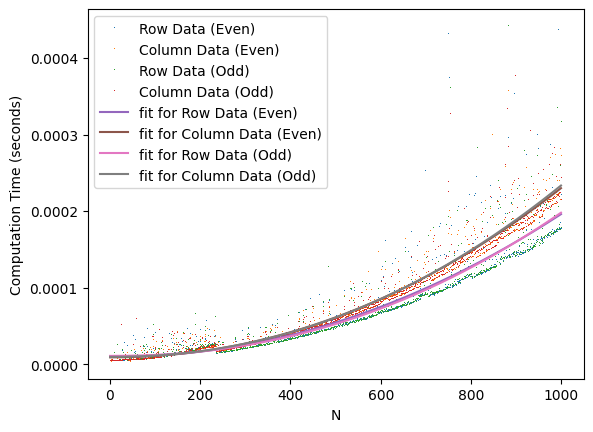

Predicted Fitting Exponent for Even Row Summation: 2.054642546123042 ± 0.07398554205589325
Predicted Fitting Exponent for Even Column Summation: 2.085251524534673 ± 0.033823450216088534
Predicted Fitting Exponent for Odd Row Summation: 2.170761785975785 ± 0.06561100572554697
Predicted Fitting Exponent for Odd Column Summation: 2.130539119017969 ± 0.033823450216088534


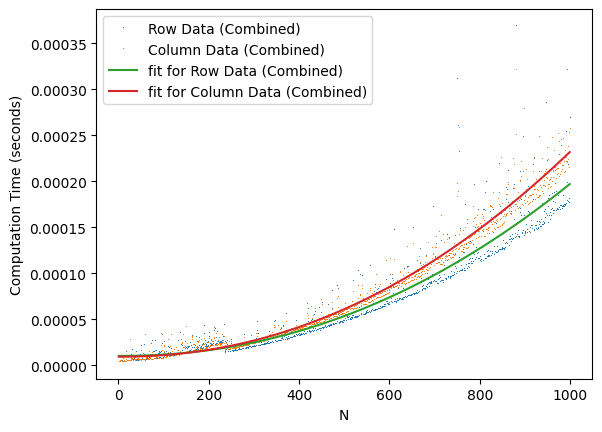

Predicted Fitting Exponent for Combined Row Summation: 2.1109301593364616 ± 0.056047427649715834
Predicted Fitting Exponent for Combined Column Summation: 2.1081178601096835 ± 0.029357520103283245


In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import timeit

#Function to generate even and odd matrices
def generate_matrices(n):
    '''Generates two nxn matrices, E and O. E contains the first n^2 even numbers (0, 2, 4, etc...)
      ordered from least to greatest across rows and down columns and O contains the first n^2 odd numbers ordered in the same way.
      
      n = size of matrix. Input of n produces two nxn matrices.'''
    #Create an array with even numbers from 0 to 2*n^2-2
    E = np.arange(0, 2*n**2, 2).reshape(n, n) #makes an array ranging from 0 to 2n^2 in steps of 2, then reshapes into n rows on length n, making an nxn matrix.
    
    #Create an array with odd numbers from 1 to 2*n**2-1
    O = np.arange(1, 2*n**2 + 1, 2).reshape(n, n)
    
    return E, O

def axis_summation(matrix,row_or_column):
    ''' 
    matrix: The matrix over which you will do the axis summation
    row_or_column: 0 or 1. The axis over which you want to sum. 1 input sums over rows, 0 input sums over columns.
    '''
    if row_or_column == 1:
        #Sum over rows
        return np.einsum('ij->i', matrix)
    elif row_or_column == 0:
        #Sum over columns
        return np.einsum('ij->j', matrix)
    else:
        raise ValueError("Invalid axis. Use 0 for columns or 1 for rows.")
        
        
#Set the maximum matrix size
N = 1000

#NEW LISTS
t_N_rows_even = []
t_N_rows_odd = []
t_N_columns_even = []
t_N_columns_odd = []

#Loop through matrix sizes from 1 to N and time their matrix summation
for n in range(1, N):
    #MODIFICATION STARTS
    if n <= 5:
        E, O = generate_matrices(n)
        
        print('--------------------------------------------------------------------------------------------------------------')
        print('Matrix Size ' + '=' + ' ' +  str(n) + 'x' + str(n))
        print('Even Matrix' + ' = ' + str(E))
        print('Odd Matrix' + ' = ' + str(O))

  
        #Time the row and column summation for the even matrix using timeit
        t_even_rows = timeit.timeit(lambda: axis_summation(E, 1), number=500) / 500
        t_even_columns = timeit.timeit(lambda: axis_summation(E, 0), number=500) / 500

        A = axis_summation(E,1)
        print('Sum over rows (Even) = ' + str(A))
        A = axis_summation(E,0)
        print('Sum over columns (Even) = ' + str(A))

        print('Average Time for rows (Even) = ' + str(t_even_rows))
        print('Average Time for columns (Even) = ' + str(t_even_columns))

        #Append the calculation time to the even lists        
        t_N_rows_even.append(t_even_rows)
        t_N_columns_even.append(t_even_columns)
        
        #Time the row and column summation for the odd matrix using timeit
        t_odd_rows = timeit.timeit(lambda: axis_summation(O, 1), number=500) / 500
        t_odd_columns = timeit.timeit(lambda: axis_summation(O, 0), number=500) / 500

        A = axis_summation(O,1)
        print('Sum over rows (Odd) = ' + str(A))
        A = axis_summation(O,0)
        print('Sum over columns (Odd) = ' + str(A))

        print('Average Time for rows (Odd) = ' + str(t_odd_rows))
        print('Average Time for columns (Odd) = ' + str(t_odd_columns))

        #Append the calculation time to the odd lists        
        t_N_rows_odd.append(t_odd_rows)
        t_N_columns_odd.append(t_odd_columns)

        A = t_N_rows_even    
        print('Row times list (Even): ' + str(A))
        A = t_N_columns_even
        print('Column times list (Even): ' + str(A))
        A = t_N_rows_odd    
        print('Row times list (Odd): ' + str(A))
        A = t_N_columns_odd
        print('Column times list (Odd): ' + str(A))
    
    else:
        E, O = generate_matrices(n)
        
        #Time the row and column summation for the even matrix using timeit
        t_even_rows = timeit.timeit(lambda: axis_summation(E, 1), number=500) / 500
        t_even_columns = timeit.timeit(lambda: axis_summation(E, 0), number=500) / 500

        #Time the row and column summation for the odd matrix using timeit
        t_odd_rows = timeit.timeit(lambda: axis_summation(O, 1), number=500) / 500
        t_odd_columns = timeit.timeit(lambda: axis_summation(O, 0), number=500) / 500

        #Append times to separate lists
        t_N_rows_even.append(t_even_rows)
        t_N_columns_even.append(t_even_columns)
        t_N_rows_odd.append(t_odd_rows)
        t_N_columns_odd.append(t_odd_columns)
    

print('--------------------------------------------------------------------------------------------------------------')
print('And so on . . . . . ')
print('--------------------------------------------------------------------------------------------------------------')
  
    
#Convert the matrix sizes and times to numpy arrays
N_values = np.arange(1, N)
t_N_rows_even = np.array(t_N_rows_even)
t_N_columns_even = np.array(t_N_columns_even)
t_N_rows_odd = np.array(t_N_rows_odd)
t_N_columns_odd = np.array(t_N_columns_odd)


#Define the fitting function (Power Law: t(N) = A * N^p)
def fit(N, p, A, b):
    ''' Function we use to fit our data.
     b = y-intercept
     A = scaling factor
     p = scaling exponent
     N = size of data
       '''
    return A * N**p+b

#Perform curve fitting for row and column summation for even matrix
parameters_rows_even, covariance_rows_even = opt.curve_fit(fit, N_values, t_N_rows_even, p0=[2, 10**-5, 0.3], maxfev=10000)
perr_rows_even = np.sqrt(np.diag(covariance_rows_even))

parameters_columns_even, covariance_columns_even = opt.curve_fit(fit, N_values, t_N_columns_even, p0=[2, 10**-5, 0.3], maxfev=10000)
perr_columns_even = np.sqrt(np.diag(covariance_columns_even))

#Perform curve fitting for row and column summation for odd matrix

parameters_rows_odd, covariance_rows_odd = opt.curve_fit(fit, N_values, t_N_rows_odd, p0=[2, 10**-5, 0.3], maxfev=10000)
perr_rows_odd = np.sqrt(np.diag(covariance_rows_odd))

parameters_columns_odd, covariance_columns_odd = opt.curve_fit(fit, N_values, t_N_columns_odd, p0=[2, 10**-5, 0.3], maxfev=10000)
perr_columns_odd = np.sqrt(np.diag(covariance_columns_even))

#Generate fitted values for plotting
fitted_t_N_rows_even = fit(N_values, *parameters_rows_even)
fitted_t_N_columns_even = fit(N_values, *parameters_columns_even)
fitted_t_N_rows_odd = fit(N_values, *parameters_rows_odd)
fitted_t_N_columns_odd = fit(N_values, *parameters_columns_odd)

#Plot the original data
plt.plot(N_values, t_N_rows_even, ',', label='Row Data (Even)', markersize=2)
plt.plot(N_values, t_N_columns_even, ',', label='Column Data (Even)', markersize=2)
plt.plot(N_values, t_N_rows_odd, ',', label='Row Data (Odd)', markersize=2)
plt.plot(N_values, t_N_columns_odd, ',', label='Column Data (Odd)', markersize=2)

#Plot the fitted curve
plt.plot(N_values, fitted_t_N_rows_even, label='fit for Row Data (Even)', zorder=10)
plt.plot(N_values, fitted_t_N_columns_even, label='fit for Column Data (Even)', zorder=10)
plt.plot(N_values, fitted_t_N_rows_odd, label='fit for Row Data (Odd)', zorder=10)
plt.plot(N_values, fitted_t_N_columns_odd, label='fit for Column Data (Odd)', zorder=10)
plt.xlabel('N')
plt.ylabel('Computation Time (seconds)')
plt.legend()
plt.show()

#Print the fitting exponent and coefficient
print('Predicted Fitting Exponent for Even Row Summation: ' + str(parameters_rows_even[0])+ ' ± ' + str(perr_rows_even[0]))
print('Predicted Fitting Exponent for Even Column Summation: ' + str(parameters_columns_even[0])+ ' ± ' + str(perr_columns_even[0]))
print('Predicted Fitting Exponent for Odd Row Summation: ' + str(parameters_rows_odd[0])+ ' ± ' + str(perr_rows_odd[0]))
print('Predicted Fitting Exponent for Odd Column Summation: ' + str(parameters_columns_odd[0])+ ' ± ' + str(perr_columns_odd[0]))



#Combine even and odd timings by averaging them
t_N_rows_combined = [(t_even + t_odd) / 2 for t_even, t_odd in zip(t_N_rows_even, t_N_rows_odd)]
t_N_columns_combined = [(t_even + t_odd) / 2 for t_even, t_odd in zip(t_N_columns_even, t_N_columns_odd)]


def fit(N, p, A, b):
    ''' Function we use to fit our data.
     b = y-intercept
     A = scaling factor
     p = scaling exponent
     N = size of data
       '''
    return A * N**p+b

#Perform curve fitting for row and column summation
parameters_rows_combined, covariance_rows_combined = opt.curve_fit(fit, N_values, t_N_rows_combined, p0=[2, 10**-5, 0.3], maxfev=10000)
perr_rows_combined = np.sqrt(np.diag(covariance_rows_combined))

parameters_columns_combined, covariance_columns_combined = opt.curve_fit(fit, N_values, t_N_columns_combined, p0=[2, 10**-5, 0.3], maxfev=10000)
perr_columns_combined = np.sqrt(np.diag(covariance_columns_combined))

#Generate fitted values for plotting
fitted_t_N_rows_combined = fit(N_values, *parameters_rows_combined)
fitted_t_N_columns_combined = fit(N_values, *parameters_columns_combined)


#Plot the original data
plt.plot(N_values, t_N_rows_combined, ',', label='Row Data (Combined)', markersize=2)
plt.plot(N_values, t_N_columns_combined, ',', label='Column Data (Combined)', markersize=2)

#Plot the fitted curve
plt.plot(N_values, fitted_t_N_rows_combined, label='fit for Row Data (Combined)', zorder=10)
plt.plot(N_values, fitted_t_N_columns_combined, label='fit for Column Data (Combined)', zorder=10)
plt.xlabel('N')
plt.ylabel('Computation Time (seconds)')
plt.legend()
plt.show()

#Print the fitting exponent and coefficient
print('Predicted Fitting Exponent for Combined Row Summation: ' + str(parameters_rows_combined[0])+ ' ± ' + str(perr_rows_combined[0]))
print('Predicted Fitting Exponent for Combined Column Summation: ' + str(parameters_columns_combined[0])+ ' ± ' + str(perr_columns_combined[0]))